In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans


In [2]:
path_rand_demand = "dati/networks/dataset-network-out/NET_0_bd_0_005_h_720_leak_area_0_nodes.csv"
data = pd.read_csv(path_rand_demand, delimiter=";")
columns = list(data.columns)
print(columns)

['hour', 'nodeID', 'base_demand', 'demand_value', 'head_value', 'pressure_value', 'x_pos', 'y_pos', 'node_type', 'has_leak', 'leak_area_value', 'leak_discharge_value', 'leak_demand_value']


In [3]:
nodelist = data["nodeID"].unique()
print(nodelist)

[880000 880001 880002 880003 880004 880005 880006 880007 880008 880009
 880010 880011 880012]


## Draw the Network Structure

In [4]:
colors = ['black', 'blue', 'red', 'grey', 'brown', 'orange', 'gold', 'yellow', 'cyan', 'pink']
# print network topology
min_x_pos = data["x_pos"].min()
min_y_pos = data["y_pos"].min()

print(min_x_pos)
print(min_y_pos)

4306392.78
3780039.0


Cluster Data

In [5]:
numberOutputCluster = 2  # 9 #12
cluster_map = pd.DataFrame()
# Take the intersection between the actual columns of the dataset and the columns to drop
columns_to_drop = {'hour', 'nodeID', 'base_demand', 'demand_value', 'head_value', 'pressure_value', 'node_type',
                   'has_leak', 'leak_area_value', 'leak_discharge_value', 'leak_demand_value', 'flow_demand_in',
                   'demand_0', 'head_0', 'pressure_0', 'demand_1', 'head_1', 'pressure_1', 'demand_2', 'head_2',
                   'pressure_2', 'demand_3', 'head_3', 'pressure_3', 'demand_4', 'head_4', 'pressure_4', 'demand_5',
                   'head_5', 'pressure_5', 'demand_6', 'head_6', 'pressure_6', 'demand_7', 'head_7', 'pressure_7',
                   'demand_8', 'head_8', 'pressure_8', 'demand_9', 'head_9', 'pressure_9', 'flow_demand_out',
                   'leak_group'}
intersection = set(columns).intersection(columns_to_drop)
kmeans_matrix = data.drop(columns=intersection).values
len(kmeans_matrix)

9360

In [6]:
if len(kmeans_matrix) > numberOutputCluster:
    kmeans = KMeans(n_clusters=numberOutputCluster, n_init=2)
    kmeans.fit(kmeans_matrix)
    clusterLabel = kmeans.labels_  # kmeans label
    data['cluster'] = kmeans.labels_


In [7]:
def plot_gws(ax):    
    distGW = 3.2
    offsset = 2
    
    for ii in range(8):
        for jj in range(8):
            x_pos = jj * distGW + offsset
            y_pos = ii * distGW + offsset
            
            ax.scatter(x_pos, y_pos, c='b', marker='^', s=120, label="GW")
            ax.add_artist(plt.Circle((x_pos, y_pos), 2.4, fill=False, color='b'))

0


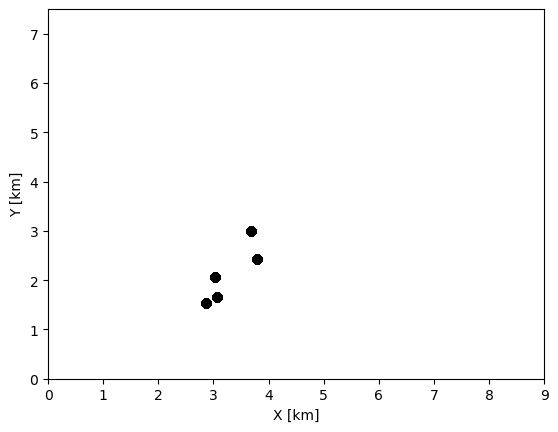

1


In [9]:
def plot_network():
    fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)
    color_index = 0
    
    for color_id, label in enumerate(np.unique(clusterLabel)):
        print(label)
        cs = colors[color_id]
        node_group = data[data["cluster"] == label]
        ax.scatter((node_group["x_pos"] - min_x_pos) / 1000, 
                   (node_group["y_pos"] - min_y_pos) / 1000, 
                   c=cs, label=label)
        
        ax.set_xlabel('X [km]')
        ax.set_ylabel('Y [km]')
        ax.set_xlim(0, 9)
        ax.set_ylim(0, 7.5)
        plt.show()
        
plot_network()

## Plot the temporal data of Nodes

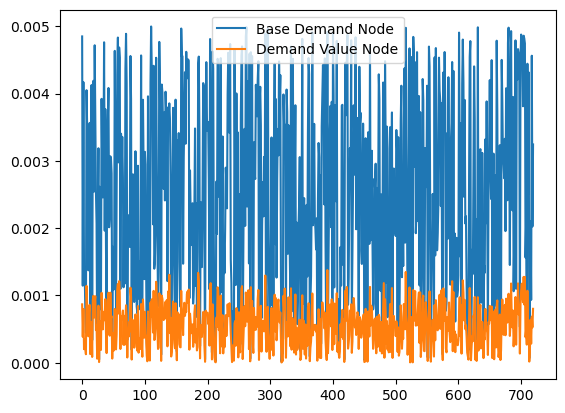

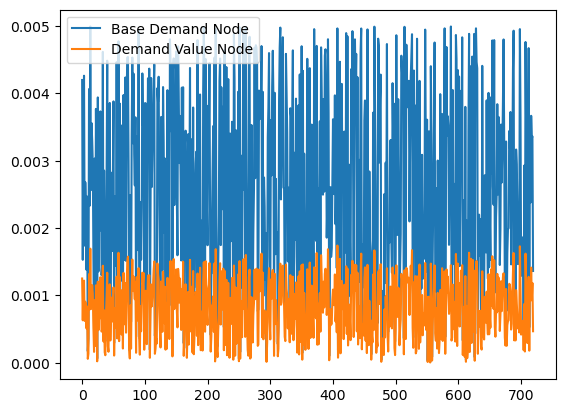

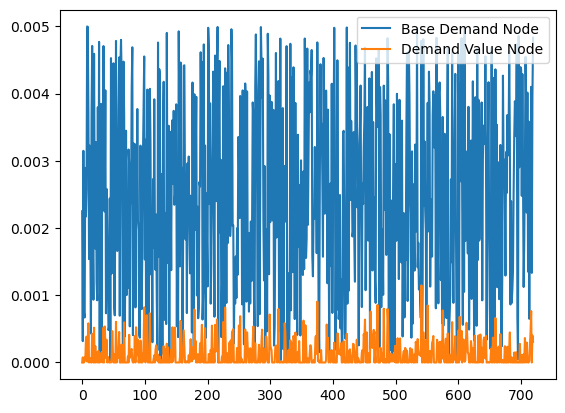

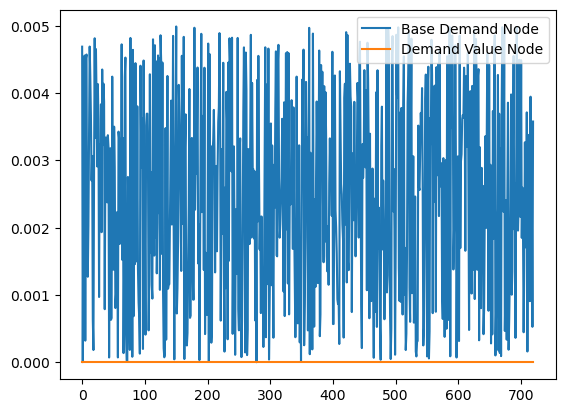

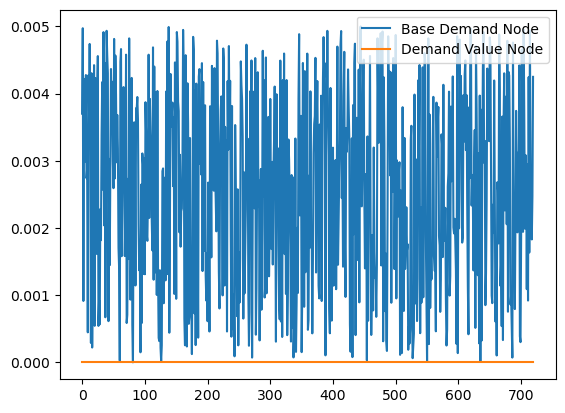

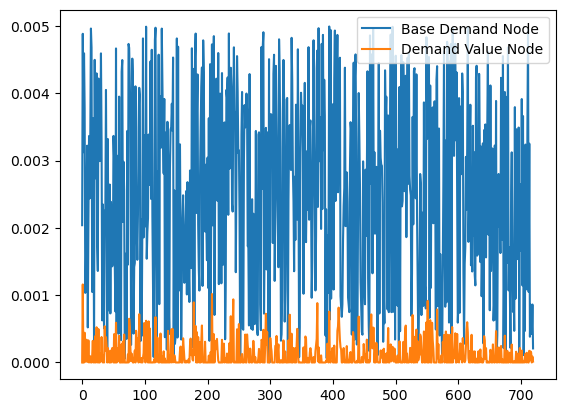

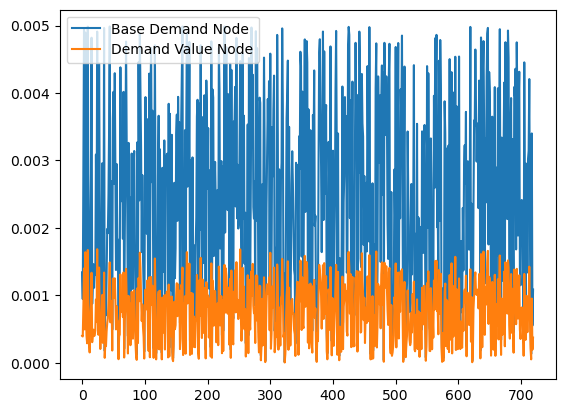

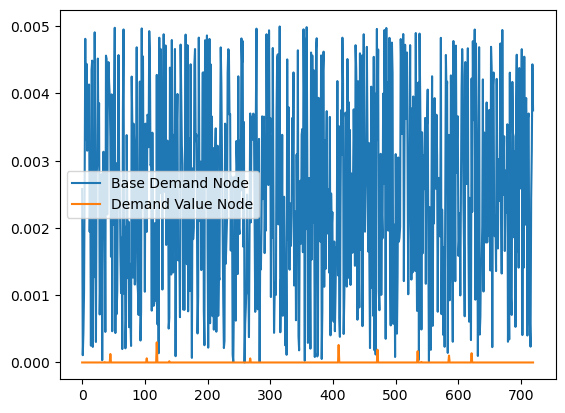

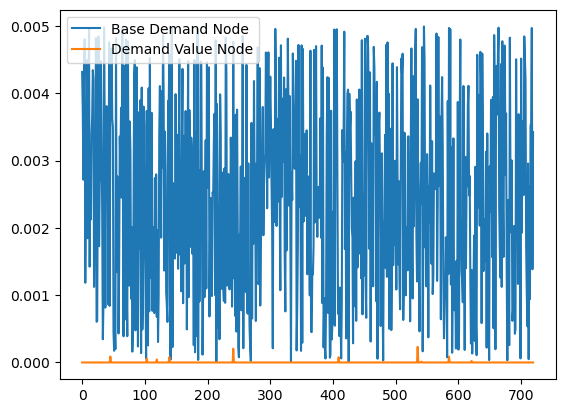

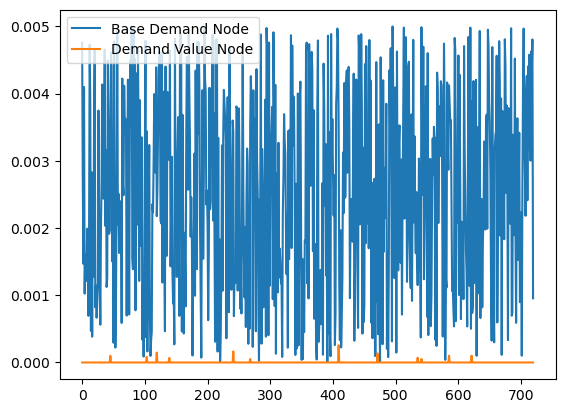

In [141]:
for i in range(10):
    data_node = data[data["nodeID"] == nodelist[i]]
    base_demand = data_node["base_demand"].values
    # leak_demand = data_node["leak_demand_value"].values
    demand_value = data_node["demand_value"].values
    plt.plot(base_demand, label="Base Demand Node")
    plt.plot(demand_value, label="Demand Value Node")
    # plt.plot(leak_demand, label="Leak Demand Value Node")
    plt.legend()
    plt.show()